# Initial Messaround
## June 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os


from src.utils import *
from src.plotting import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# this is a mapping from players to teams

team_info_df = pd.read_csv("data/team_info.csv")

In [4]:
team_info_df.shape

(1039, 3)

In [5]:
team_info_df.head()

,team_id,player_id,team_year
0,TeamA1,1059,1902
1,TeamA1,1171,1902
2,TeamA1,1177,1902
3,TeamA1,1181,1902
4,TeamA1,1195,1902


In [6]:
root_dirs = ['data/game_events/', 'data/game_info/'] 

files_with_no_at_bat_data = []

for root_dir in root_dirs:
    for sub_dir, dirs, files in os.walk(root_dir):
        for file in files:
            if "checkpoint" in file:
                continue
            
            df = pd.read_csv(os.path.join(sub_dir, file), index_col=0)

            if df[df["at_bat"].notnull()].shape[0] ==  0:
                files_with_no_at_bat_data.append(file)
                
print(len(files_with_no_at_bat_data))

54


In [7]:
# "1900_02_TeamKJ_TeamB" is what I have been working with so far

which_game = "1903_01_TeamNE_TeamA2" # "1900_02_TeamKJ_TeamB" # "1903_01_TeamNE_TeamA2"

In [8]:
# this is 1 indexed, ew

game_info_df = pd.read_csv("data/game_info/game_info-" + which_game + ".csv", index_col=0)

In [9]:
game_info_df.head(30)

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
5,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
6,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,6,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
7,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,7,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
8,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,8,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
9,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,9,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
10,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,10,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0


In [10]:
game_info_df[game_info_df["at_bat"].notnull()].shape

(323, 20)

In [11]:
game_events_df = pd.read_csv("data/game_events/game_events-" + which_game + ".csv", index_col=0)


game_events_df["event"] = game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])

In [12]:
game_events_df.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired


In [13]:
game_events_df[game_events_df["at_bat"].notnull()]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired
...,...,...,...,...,...,...,...,...
1254,1903_01_TeamNE_TeamA2,326,84,327,10930990,255,16,ball bounce
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play)
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired


In [14]:
#player_pos_df = pd.read_csv("data/player_pos/TeamB/player_pos-1900_TeamB/player_pos-" + which_game + ".csv", index_col=0)
"1903_01_TeamNE_TeamA2"

player_pos_df = pd.read_csv("data/player_pos/TeamA2/player_pos-1903_TeamA2/player_pos-" + which_game + ".csv", index_col=0)

print(player_pos_df.shape)

(626289, 6)


In [15]:
player_pos_df.head()

,game_str,play_id,timestamp,player_position,field_x,field_y
1,1903_01_TeamNE_TeamA2,1,19199,1,0.4377,59.9220
2,1903_01_TeamNE_TeamA2,1,19232,1,0.4410,59.9139
3,1903_01_TeamNE_TeamA2,1,19265,1,0.4446,59.9064
4,1903_01_TeamNE_TeamA2,1,19298,1,0.4482,59.8992
5,1903_01_TeamNE_TeamA2,1,19331,1,0.4521,59.8917


In [16]:
ball_pos_df = pd.read_csv("data/ball_pos/ball_pos-" + which_game + ".csv", index_col=0)
print(ball_pos_df.shape)

(14258, 6)


In [17]:
ball_pos_df

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
1,1903_01_TeamNE_TeamA2,1,19199,-2.387367,54.2868,6.37134
2,1903_01_TeamNE_TeamA2,1,19232,-2.274918,49.9272,6.29283
3,1903_01_TeamNE_TeamA2,1,19265,-2.175885,45.5967,6.19611
4,1903_01_TeamNE_TeamA2,1,19298,-2.090271,41.2950,6.08118
5,1903_01_TeamNE_TeamA2,1,19331,-2.018073,37.0221,5.94801
...,...,...,...,...,...,...
14254,1903_01_TeamNE_TeamA2,326,10933564,49.362600,71.1342,5.61570
14255,1903_01_TeamNE_TeamA2,326,10933597,52.424700,70.1736,5.24322
14256,1903_01_TeamNE_TeamA2,326,10933630,55.468200,69.2112,4.84002
14257,1903_01_TeamNE_TeamA2,326,10933663,58.492500,68.2467,4.40613


In [18]:
# find a play where they throw the ball more that once

event_counts_df = pd.DataFrame(game_events_df[["play_id", "event_code"]].groupby("event_code").value_counts())

In [19]:
event_counts_df.loc[2]

,0
play_id,
112,3
149,3
230,3
124,3
125,3
...,...
64,1
65,1
66,1


### Check that my plotting function works ok

In [20]:
plt.ioff()

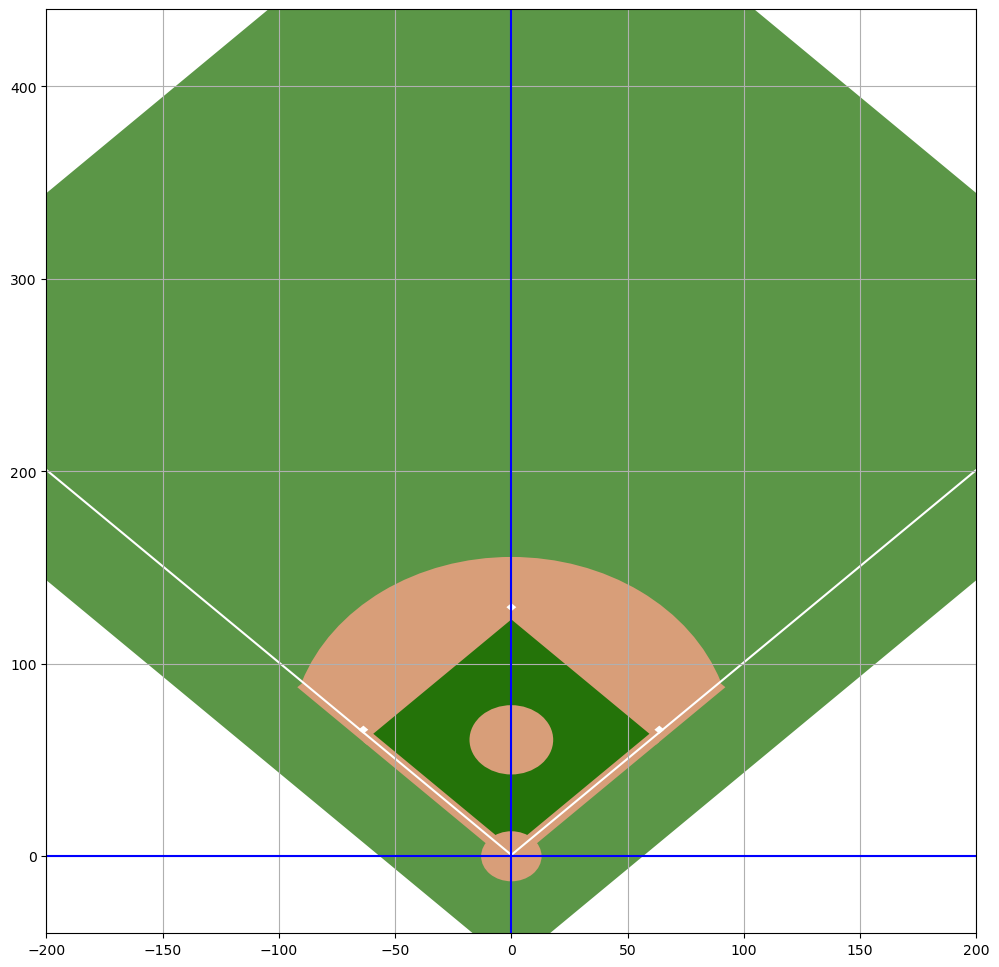

In [21]:
bf = Baseball_Field(figsize=(12,12))

### Try plotting a play!

In [22]:
# 2 is a deflection into right field!
# play 8 is a hit to center field that have a weird strobing effect because C is out of phase
# 22 I think is a bloop to right field
# 34 is a fly to left
# 38 is a fly to center
# 47 fly to center

# 179 is 6-4-3 attempt, but not converted double play
# 211 is a 4-6-3 double play
# 282 is a 6-4-3 double play

play_num = 202 # 203 # 179


this_play_events = game_events_df.loc[game_events_df["play_per_game"] == play_num, :]
this_play_events.loc[:, "timestamp"] = this_play_events.loc[:, "timestamp"].apply(lambda x: round(x, -1))


this_play_player_pos = player_pos_df.loc[player_pos_df["play_id"] == play_num, :]
this_play_player_pos.loc[:, "timestamp"] = this_play_player_pos.loc[:, "timestamp"].apply(lambda x: round(x, -1))

this_play_ball_pos = ball_pos_df.loc[ball_pos_df["play_id"] == play_num, :]
this_play_ball_pos.loc[:, "timestamp"] = this_play_ball_pos.loc[:, "timestamp"].apply(lambda x: round(x, -1))


/var/folders/dq/wt5yn10s5hz3w18xwlm2kvqw0000gn/T/ipykernel_76504/2590529344.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_play_events.loc[:, "timestamp"] = this_play_events.loc[:, "timestamp"].apply(lambda x: round(x, -1))
/var/folders/dq/wt5yn10s5hz3w18xwlm2kvqw0000gn/T/ipykernel_76504/2590529344.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_play_player_pos.loc[:, "timestamp"] = this_play_player_pos.loc[:, "timestamp"].apply(lambda x: round(x, -1))
/var/folders/dq/wt5yn10s5hz3w18xwl

In [23]:
this_play_events

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
771,1903_01_TeamNE_TeamA2,202,51,202,6570930,1,1,pitch
772,1903_01_TeamNE_TeamA2,202,51,202,6571390,2,2,ball acquired
773,1903_01_TeamNE_TeamA2,202,51,202,6571390,0,5,end of play


In [24]:
this_play_player_pos.tail()

,game_str,play_id,timestamp,player_position,field_x,field_y
382248,1903_01_TeamNE_TeamA2,202,6574260,18,72.8550,52.8042
382249,1903_01_TeamNE_TeamA2,202,6574290,18,72.8529,52.7901
382250,1903_01_TeamNE_TeamA2,202,6574330,18,72.8508,52.7763
382251,1903_01_TeamNE_TeamA2,202,6574360,18,72.8490,52.7625
382252,1903_01_TeamNE_TeamA2,202,6574390,18,72.8472,52.7487


In [25]:
this_play_player_pos.loc[(this_play_player_pos["player_position"] >= 10) & (this_play_player_pos["player_position"] <= 13), :]

,game_str,play_id,timestamp,player_position,field_x,field_y
381723,1903_01_TeamNE_TeamA2,202,6570930,10,-2.7843,-0.6894
381724,1903_01_TeamNE_TeamA2,202,6570960,10,-2.7843,-0.6894
381725,1903_01_TeamNE_TeamA2,202,6570990,10,-2.7843,-0.6894
381726,1903_01_TeamNE_TeamA2,202,6571030,10,-2.7843,-0.6894
381727,1903_01_TeamNE_TeamA2,202,6571060,10,-2.7843,-0.6894
...,...,...,...,...,...,...
381930,1903_01_TeamNE_TeamA2,202,6574260,11,54.4041,74.8986
381931,1903_01_TeamNE_TeamA2,202,6574290,11,54.3387,75.0255
381932,1903_01_TeamNE_TeamA2,202,6574330,11,54.2733,75.1527
381933,1903_01_TeamNE_TeamA2,202,6574360,11,54.2079,75.2799


In [26]:
this_play_player_pos["player_position"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 16, 18])

In [27]:
this_play_ball_pos

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
8118,1903_01_TeamNE_TeamA2,202,6570930,-2.144772,54.59430,6.267960
8119,1903_01_TeamNE_TeamA2,202,6570960,-1.844589,50.27520,5.976330
8120,1903_01_TeamNE_TeamA2,202,6570990,-1.558212,45.98280,5.668920
8121,1903_01_TeamNE_TeamA2,202,6571030,-1.285638,41.71680,5.345730
8122,1903_01_TeamNE_TeamA2,202,6571060,-1.026873,37.47750,5.006760
8123,1903_01_TeamNE_TeamA2,202,6571090,-0.781914,33.26490,4.651980
8124,1903_01_TeamNE_TeamA2,202,6571120,-0.550761,29.07888,4.281450
8125,1903_01_TeamNE_TeamA2,202,6571160,-0.333414,24.91947,3.895140
8126,1903_01_TeamNE_TeamA2,202,6571190,-0.129872,20.78670,3.493020
8127,1903_01_TeamNE_TeamA2,202,6571220,0.059863,16.68054,3.075150


In [28]:
this_play_ball_pos.head()

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
8118,1903_01_TeamNE_TeamA2,202,6570930,-2.144772,54.5943,6.26796
8119,1903_01_TeamNE_TeamA2,202,6570960,-1.844589,50.2752,5.97633
8120,1903_01_TeamNE_TeamA2,202,6570990,-1.558212,45.9828,5.66892
8121,1903_01_TeamNE_TeamA2,202,6571030,-1.285638,41.7168,5.34573
8122,1903_01_TeamNE_TeamA2,202,6571060,-1.026873,37.4775,5.00676


In [29]:
this_play_ball_pos.tail()

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
8128,1903_01_TeamNE_TeamA2,202,6571260,0.235792,12.60102,2.641479
8129,1903_01_TeamNE_TeamA2,202,6571290,0.397914,8.54814,2.192034
8130,1903_01_TeamNE_TeamA2,202,6571320,0.546231,4.52187,1.726809
8131,1903_01_TeamNE_TeamA2,202,6571360,0.680742,0.52224,1.245804
8132,1903_01_TeamNE_TeamA2,202,6571390,0.801447,-3.45078,0.749016


In [30]:
this_play_ball_pos["timestamp"].shape

(15,)

In [31]:
this_play_ball_pos.min()

game_str           1903_01_TeamNE_TeamA2
play_id                              202
timestamp                        6570930
ball_position_x                -2.144772
ball_position_y                 -3.45078
ball_position_z                 0.749016
dtype: object

In [32]:
this_play_player_pos["timestamp"].unique().shape

(106,)

In [33]:
this_play_timestamps = pd.concat([this_play_ball_pos["timestamp"], this_play_player_pos["timestamp"], this_play_events["timestamp"]])\
.drop_duplicates().sort_values().values

In [34]:
len(this_play_timestamps)

106

In [35]:
this_play_ball_pos.max()

game_str           1903_01_TeamNE_TeamA2
play_id                              202
timestamp                        6571390
ball_position_x                 0.801447
ball_position_y                  54.5943
ball_position_z                  6.26796
dtype: object

In [36]:
this_play_timestamps = pd.concat([this_play_ball_pos["timestamp"], this_play_player_pos["timestamp"]]).drop_duplicates().sort_values().values

In [37]:
len(this_play_timestamps)

106

In [38]:
def animate_fielders(i, bf):
    
    # print(i)
    
    this_play_timestamps = pd.concat([this_play_ball_pos["timestamp"], this_play_player_pos["timestamp"]])\
    .drop_duplicates().sort_values().values

    t = this_play_timestamps[i]
    # for t in this_play_timestamps:    

    this_ts_fielders = this_play_player_pos.loc[(this_play_player_pos["timestamp"] == t) &\
                                                 (this_play_player_pos["player_position"] <= 9), :]
    
    this_ts_batters = this_play_player_pos.loc[(this_play_player_pos["timestamp"] == t) &\
                                                 (this_play_player_pos["player_position"] >= 10) &\
                                               (this_play_player_pos["player_position"] <= 13), :]
    
    this_ts_ball = this_play_ball_pos.loc[this_play_ball_pos["timestamp"] == t, :]
    
    this_ts_event = this_play_events.loc[this_play_events["timestamp"] == t, :]


    # maybe need to reput the fig here 
    
    bf.plot_all_components(this_ts_fielders, this_ts_batters, this_ts_ball, this_ts_event)
    
    """
    bf.add_fielders_to_plot(this_ts_fielders)
    
    bf.add_batters_to_plot(this_ts_batters)

    bf.add_ball_to_plot(this_ts_ball)
    
    """
    
    bf.add_event_annotations(this_ts_event)
    
    
    return bf.fig 

    

this_play_timestamps = pd.concat([this_play_ball_pos["timestamp"], this_play_player_pos["timestamp"]])\
    .drop_duplicates().sort_values().values

t = 653050#this_play_timestamps[10]

this_ts_fielders = this_play_player_pos.loc[(this_play_player_pos["timestamp"] == t) &\
                                                 (this_play_player_pos["player_position"] <= 9), :]

this_ts_ball = this_play_ball_pos.loc[this_play_ball_pos["timestamp"] == t, :]

this_ts_event = this_play_events.loc[this_play_events["timestamp"] == t, :]

this_ts_ball

this_ts_fielders

this_ts_event['player_position'].values[0]

this_ts_fielders.loc[this_ts_fielders["player_position"] == this_ts_event['player_position'].values[0], ["field_x", "field_y"]].values

this_ts_ball.loc[:, "ball_position_x"] = this_ts_fielders.loc[this_ts_fielders["player_position"] == this_ts_event['player_position'].values[0], "field_x"].values
this_ts_ball.loc[:, "ball_position_y"] = this_ts_fielders.loc[this_ts_fielders["player_position"] == this_ts_event['player_position'].values[0], "field_y"].values

this_ts_ball["ball_position_z"] = 6

this_ts_ball

In [39]:
bf = Baseball_Field(figsize=(12,12))

In [40]:
# TODO: make an interpolation and snap to the other time stamps function

In [41]:
# for this first play, frame is 257
ani = FuncAnimation(bf.fig, animate_fielders, fargs=(bf,), frames=len(this_play_timestamps),
                    interval=50, repeat=True, repeat_delay = 1500)


In [42]:
# ani.save("play" + str(play_num) + ".gif", dpi=100)

In [43]:
bf.last_plot_event

## Make a new class to store the data

In [44]:
class Game:
    def __init__(self, which_game, file_path="data/"):
        
        # compute a bunch of things to help me later
        self.which_game = which_game
        
        game_string_tokens =  which_game.split("_")
        
        self.home_team = game_string_tokens[-1]
        self.away_team = game_string_tokens[-2]
        
        self.season = game_string_tokens[0]
        self.game_num = game_string_tokens[1]
        
        # read in all my data
        self.game_info_df = pd.read_csv(file_path + "game_info/game_info-" + which_game + ".csv", index_col=0)
        self.game_events_df = pd.read_csv(file_path + "game_events/game_events-" + which_game + ".csv", index_col=0)
        self.ball_pos_df = pd.read_csv(file_path + "ball_pos/ball_pos-" + which_game + ".csv", index_col=0)
        
        player_pos_path = file_path + "player_pos/" + self.home_team + "/player_pos-"
        player_pos_path += self.season + "_" + self.home_team + "/player_pos-" + which_game + ".csv"
        self.player_pos_df = pd.read_csv(player_pos_path, index_col=0)
        
        # compute velocities so I have 
        self.new_ball_pos = self._compute_velos(self.ball_pos_df, ["play_id"], ["timestamp", "ball_position_x", "ball_position_y", "ball_position_z"])
        self.new_player_pos = self._compute_velos(self.player_pos_df, ["play_id", "player_position"], ["timestamp", "field_x", "field_y"])
        
        
        self.this_ts_fielders = None
        self.this_ts_batters = None
        self.this_ts_ball = None
        
        
    def __repr__(self):
        
        game_string = which_game + "\n"
        game_string += "game_info shape: " + str(self.game_info_df.shape) + "\n"
        game_string += "game_events shape: " + str(self.game_events_df.shape) + "\n"
        game_string += "ball_pos shape: " + str(self.ball_pos_df.shape) + "\n"
        game_string += "player_pos shape: " + str(self.player_pos_df.shape) + "\n"
        
        return game_string
    
    def _compute_velos(self, df, group_by_cols, cols):
        
        lagged_df = df.groupby(group_by_cols)[cols].shift(1)
        lagged_df.columns = ["lag_1_" + s for s in cols]
        
        diff_df = df.groupby(group_by_cols)[cols].diff()
        diff_df.columns = ["diff_" + s for s in cols]
        
        velo_df = diff_df[["diff_" + s for s in cols]].div(diff_df["diff_timestamp"] / 1000, axis=0)
        cols.remove("timestamp")
        
        velo_df = velo_df.loc[:, ["diff_" + s for s in cols]]
        velo_df.columns = [s.replace("position", "velo").replace("field", "velo") for s in cols]
        
        return pd.concat([df, lagged_df, diff_df, velo_df], axis=1)
        
    
    def _smooth_columns(self, df, cols):
        pass
    
        # the easiest would be like a moving average 
        # with more effort, could do a Kalman filter?
        
        
        

In [180]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib as mpl
import numpy as np 
import pandas as pd 


class Baseball_Field1:
    # originally inspired by this!
    # https://www.kaggle.com/code/debojit23/baseball-field-structure-matplotlib
    def __init__(self, which_game, figsize=(12,12)):
        
        plt.ioff()
        self.figsize = figsize
        self.fig, self.ax = self.plot_2d_field()
        
        # a Game object takes all of the data for a given game
        # and does common data cleaning tasks
        self.game_obj = Game(which_game)
        
        
        # these are needed so you can clear some of the figure, but not all
        self.fielders_artist = None
        self.fielders_velo_artist = None
        
        self.batters_artist = None
        self.ball_artist = None
        self.event_annotation_artist = None
        self.last_plot_event = None
        self.last_player_pos = None
        
        
        self.this_ts_fielders = None
        self.this_ts_batters = None
        self.this_ts_ball = None
        
        

    def plot_2d_field(self):
        
        fig, ax = plt.subplots(1, figsize=self.figsize)

        
        dirt_color = "#D89E79"
        grass_color = "#247309"

        # light green for the whole field
        ax.add_patch(patches.Rectangle((-40, -40), 425, 425,
                                       facecolor=grass_color,
                                       alpha=0.75,
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        # inside infield dirt
        ax.add_patch(patches.Rectangle((-3, -3), 90, 90,
                                       facecolor=dirt_color,
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        # outer infield dirt wedge
        ax.add_patch(patches.Wedge((0, 60.5),
                                   95,
                                   # this is th angle where it crosses the foul line,
                                   # which is 3 ft right of the line
                                   18.51, 
                                   180 - 18.51,
                                   facecolor=dirt_color
                                      ))

        # fill in the corner gaps
        ax.add_patch(patches.Rectangle((85, -3), 127.2 - 85, 30,
                                       facecolor=dirt_color,
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.add_patch(patches.Rectangle((-85, -3), - 127.2 + 85, 30,
                                       facecolor=dirt_color,
                                       angle=-45,
                                       rotation_point = (0, 0)
                                      ))


        # infield grass
        ax.add_patch(patches.Rectangle((3, 3), 84, 84,
                                       facecolor=grass_color,
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        # pitchers mound
        ax.add_patch(patches.Circle((0, 60.5), 18,
                                       facecolor=dirt_color
                                      ))

        # home plate area
        ax.add_patch(patches.Circle((0, 0), 13,
                                       facecolor=dirt_color
                                      ))

        # foul lines
        ax.add_patch(patches.Rectangle((0, 0), 1, 300,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.add_patch(patches.Rectangle((0, 0), 300, 1,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.add_patch(patches.Rectangle((90, 0), 3, 3,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.add_patch(patches.Rectangle((90, 90), 3, 3,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.add_patch(patches.Rectangle((0, 90), 3, 3,
                                       facecolor="white",
                                       angle=45,
                                       rotation_point = (0, 0)
                                      ))

        ax.axvline(0, color='b')
        ax.axhline(0, color='b')

        ax.grid()

        ax.set_xlim(-200, 200)
        ax.set_ylim(-40, 440)
        
        # plt.show()
        return fig, ax
    
    def clear_plot(self):
        """
        a convenience function to clear a plot, so you can reuse the same objects
        """
        self.remove_fielders_from_plot()
        self.remove_fielders_from_plot()
        self.remove_ball_from_plot()
        self.remove_event_annotations_from_plot()
    
    def plot_all_components(self, this_ts_fielders, this_ts_batters, this_ts_ball, this_ts_event):
        
        
        if self.this_ts_fielders is None or self.this_ts_fielders.shape[0] != 0:
            self.this_ts_fielders = this_ts_fielders.copy()
        
        if this_ts_event.shape[0] != 0:
            self.last_plot_event = this_ts_event["event"].values[0]
            self.last_player_pos = this_ts_event['player_position'].values[0]
        
        
        if self.last_plot_event == "ball acquired":
            # this means the ball is in the fielders hand I think
            
            print("ball should be in glove here of player " + str(self.last_player_pos))
            
            this_ts_ball.loc[:, "ball_position_x"] = self.this_ts_fielders.loc[self.this_ts_fielders["player_position"] == self.last_player_pos, "field_x"].values
            this_ts_ball.loc[:, "ball_position_y"] = self.this_ts_fielders.loc[self.this_ts_fielders["player_position"] == self.last_player_pos, "field_y"].values
            this_ts_ball["ball_position_z"] = 0
            
        
        self.add_batters_to_plot(this_ts_batters)
        self.add_ball_to_plot(this_ts_ball)
        self.add_fielders_to_plot(this_ts_fielders)


    def remove_fielders_from_plot(self):
        
        if self.fielders_artist:
            self.fielders_artist.remove()
            self.fielders_artist = None
            
        if self.fielders_velo_artist:
            self.fielders_velo_artist.remove()
            self.fielders_velo_artist = None
               
    def add_fielders_to_plot(self, play_id=None, frame_index=None, timestamp=None, this_ts_fielders=None, show_velos=False, show_trails=False, color="yellow"):
        """
        Adds the fields to this objects ax
        
        Params:
            play_id (int):
            
            
        Returns:
            None
            
        Modifies:
            self.fielders_artist
        
        """
        
        if not (timestamp or play_id or this_ts_fielders):
            raise TypeError("Must provide at least one of play_id, timestamp or this_ts_fielders")
        
        if play_id and not (frame_index or timestamp):
            # this means to plot the whole play
            # this will ignore show_vectors and show_trails
            this_play_pos_data = self.game_obj.new_player_pos.loc[(self.game_obj.new_player_pos["play_id"] == play_id) &\
                                                                  (self.game_obj.new_player_pos["player_position"] <= 9), ["timestamp", "player_position", "field_x", "field_y", "velo_x", "velo_y"]].copy()
            
            self.fielders_artist = self.ax.scatter(this_play_pos_data["field_x"], this_play_pos_data["field_y"], color=color, marker='o', s=80)
            return
        elif timestamp:
            this_play_pos_data = self.game_obj.new_player_pos.loc[(self.game_obj.new_player_pos["play_id"] == play_id) &\
                                                                  (self.game_obj.new_player_pos["player_position"] <= 9), ["timestamp", "player_position", "field_x", "field_y", "velo_x", "velo_y"]].copy()
            
            this_ts_fielders = this_play_pos_data.loc[this_play_pos_data["timestamp"] == timestamp]
            
        elif frame_index:
            pass
            
        # if there is nothing in this timestamp, just quit and leave it
        if this_ts_fielders.shape[0] == 0:    
            return
        
        elif this_ts_fielders.shape[0] < 9:
            print("missing fielders data at timestamp")
            print(str(this_ts_fielders.loc[:, ["timestamp", "player_position"]]))
        
        
        # this part might yell at me! 
        if self.fielders_artist is not None and show_trails == False:
            self.fielders_artist.remove()
        
        self.fielders_artist = self.ax.scatter(this_ts_fielders["field_x"], this_ts_fielders["field_y"], color=color, marker='o', s=80)
        
        
        if show_velos:
            if self.fielders_velo_artist is not None:
            
                self.fielders_velo_artist.remove()
                self.fielders_velo_artist = None
                
            velo_scale_factor = 0.5
            
            self.fielders_velo_artist = self.ax.quiver(this_ts_fielders["field_x"], 
                                                       this_ts_fielders["field_y"], 
                                                       velo_scale_factor * this_ts_fielders["velo_x"], 
                                                       velo_scale_factor * this_ts_fielders["velo_x"],
                                                       color=color)
            
        
    def remove_batters_from_plot(self):
        
        if self.batters_artist:
            self.batters_artist.remove()
            self.batters_artist = None
    
    def add_batters_to_plot(self, this_ts_batters, show_trails = False):
        
        # if there is nothing in this timestamp, just quit and leave it
        if this_ts_batters.shape[0] == 0:
            
            return
        #elif this_ts_batters.shape[0] < 9:
        #    print("missing batters data at timestamp")
        #    print(str(this_ts_batters.loc[:, ["timestamp", "player_position"]]))
        
        if self.batters_artist is not None and show_trails == False:
            self.batters_artist.remove()
        
        self.batters_artist = self.ax.scatter(this_ts_batters["field_x"], this_ts_batters["field_y"], color='black', marker='o', s=80)
            
        
    def remove_ball_from_plot(self):
        
        if self.ball_artist:
            self.ball_artist.remove()
            self.ball_artist = None

    
    def add_ball_to_plot(self, this_ts_ball_pos, show_trails = False):
        
        # if there is nothing in this timestamp, just quit and leave it
        if this_ts_ball_pos.shape[0] == 0:
            return
        
        if self.ball_artist is not None and show_trails == False:
            self.ball_artist.remove()
            
        # this should just be one value
        z_coord = this_ts_ball_pos["ball_position_z"].values[0]
        
        self.ball_artist = self.ax.scatter(this_ts_ball_pos["ball_position_x"].values[0], this_ts_ball_pos["ball_position_y"].values[0], color='white', marker='o', s=z_coord ** 2 * 2 if z_coord > 5 else 50)
        

    def remove_event_annotations_from_plot(self):
        
        if self.event_annotation_artist:
            self.event_annotation_artist.remove()
            self.event_annotation_artist = None

        
    def add_event_annotations(self, this_ts_event, xy = (100, 10)):
        
        # if there is nothing in this timestamp, just quit
        if this_ts_event.shape[0] == 0:
            return
        
        if self.event_annotation_artist is not None:
            self.event_annotation_artist.remove()
        
        text =  str(this_ts_event["timestamp"].values[0]) + ": "
        text += str(this_ts_event["event"].values[0]) + " " + "by " + str(this_ts_event["player_position"].values[0]) 
        
        self.event_annotation_artist = self.ax.annotate(text, xy)


In [181]:
which_game = "1903_01_TeamNE_TeamA2"

g = Game(which_game=which_game)

In [182]:
g

1903_01_TeamNE_TeamA2
game_info shape: (323, 20)
game_events shape: (1258, 7)
ball_pos shape: (14258, 6)
player_pos shape: (626289, 6)

In [183]:
g.new_ball_pos.loc[:, ["ball_velo_x", "ball_velo_y","ball_velo_z"]].median()

ball_velo_x    4.283045
ball_velo_y   -7.657273
ball_velo_z   -5.319091
dtype: float64

In [184]:
bf1 = Baseball_Field1(which_game="1903_01_TeamNE_TeamA2")

In [185]:
bf1.game_obj.new_player_pos[]

SyntaxError: invalid syntax (1770769191.py, line 1)

In [187]:
# ball thrown
# play_id=203, timestamp=6591420

# first bounce: 6587955


bf1.clear_plot()


bf1.add_fielders_to_plot(play_id=203, timestamp=6587955, show_velos=True)

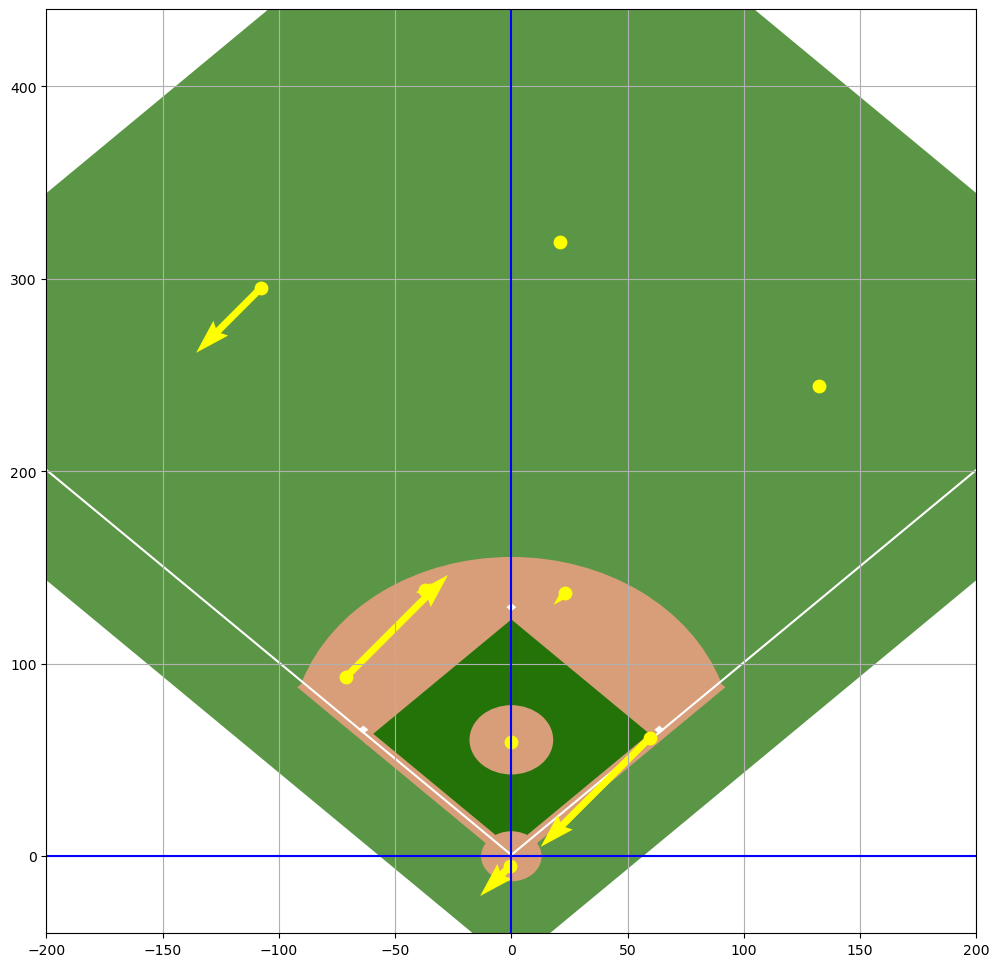

In [188]:
bf1.fig